# <center> Student ID: 202141040 </center>

# <center>Infographic</center>

#### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np 
from matplotlib.patches import Circle

#### Load Data

In [2]:
sat_data = pd.read_csv('satcat.tsv', sep='\t')
df = sat_data[sat_data['State'].str.len() ==2]

sat_data['Year'] = sat_data['LDate'].str[:4]
df = sat_data[sat_data['State'].str.len() ==2]
data_unique = df.drop_duplicates(subset=['Name'])

data_filtered = data_unique[
    data_unique['Type'].str.startswith('P', na=False) &  # Starts with 'P'
    ~data_unique['Type'].str.contains('R', case=False, na=False)  # Does NOT contain 'R'
]

astr_data = pd.read_csv('astronauts.csv')

/var/folders/67/_3_03bks05j7ch8ykcbxp4rw0000gn/T/ipykernel_86118/3849742001.py:1: DtypeWarning: Columns (1,19,21,23,25,27,29,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  sat_data = pd.read_csv('satcat.tsv', sep='\t')


#### Data Manipulation

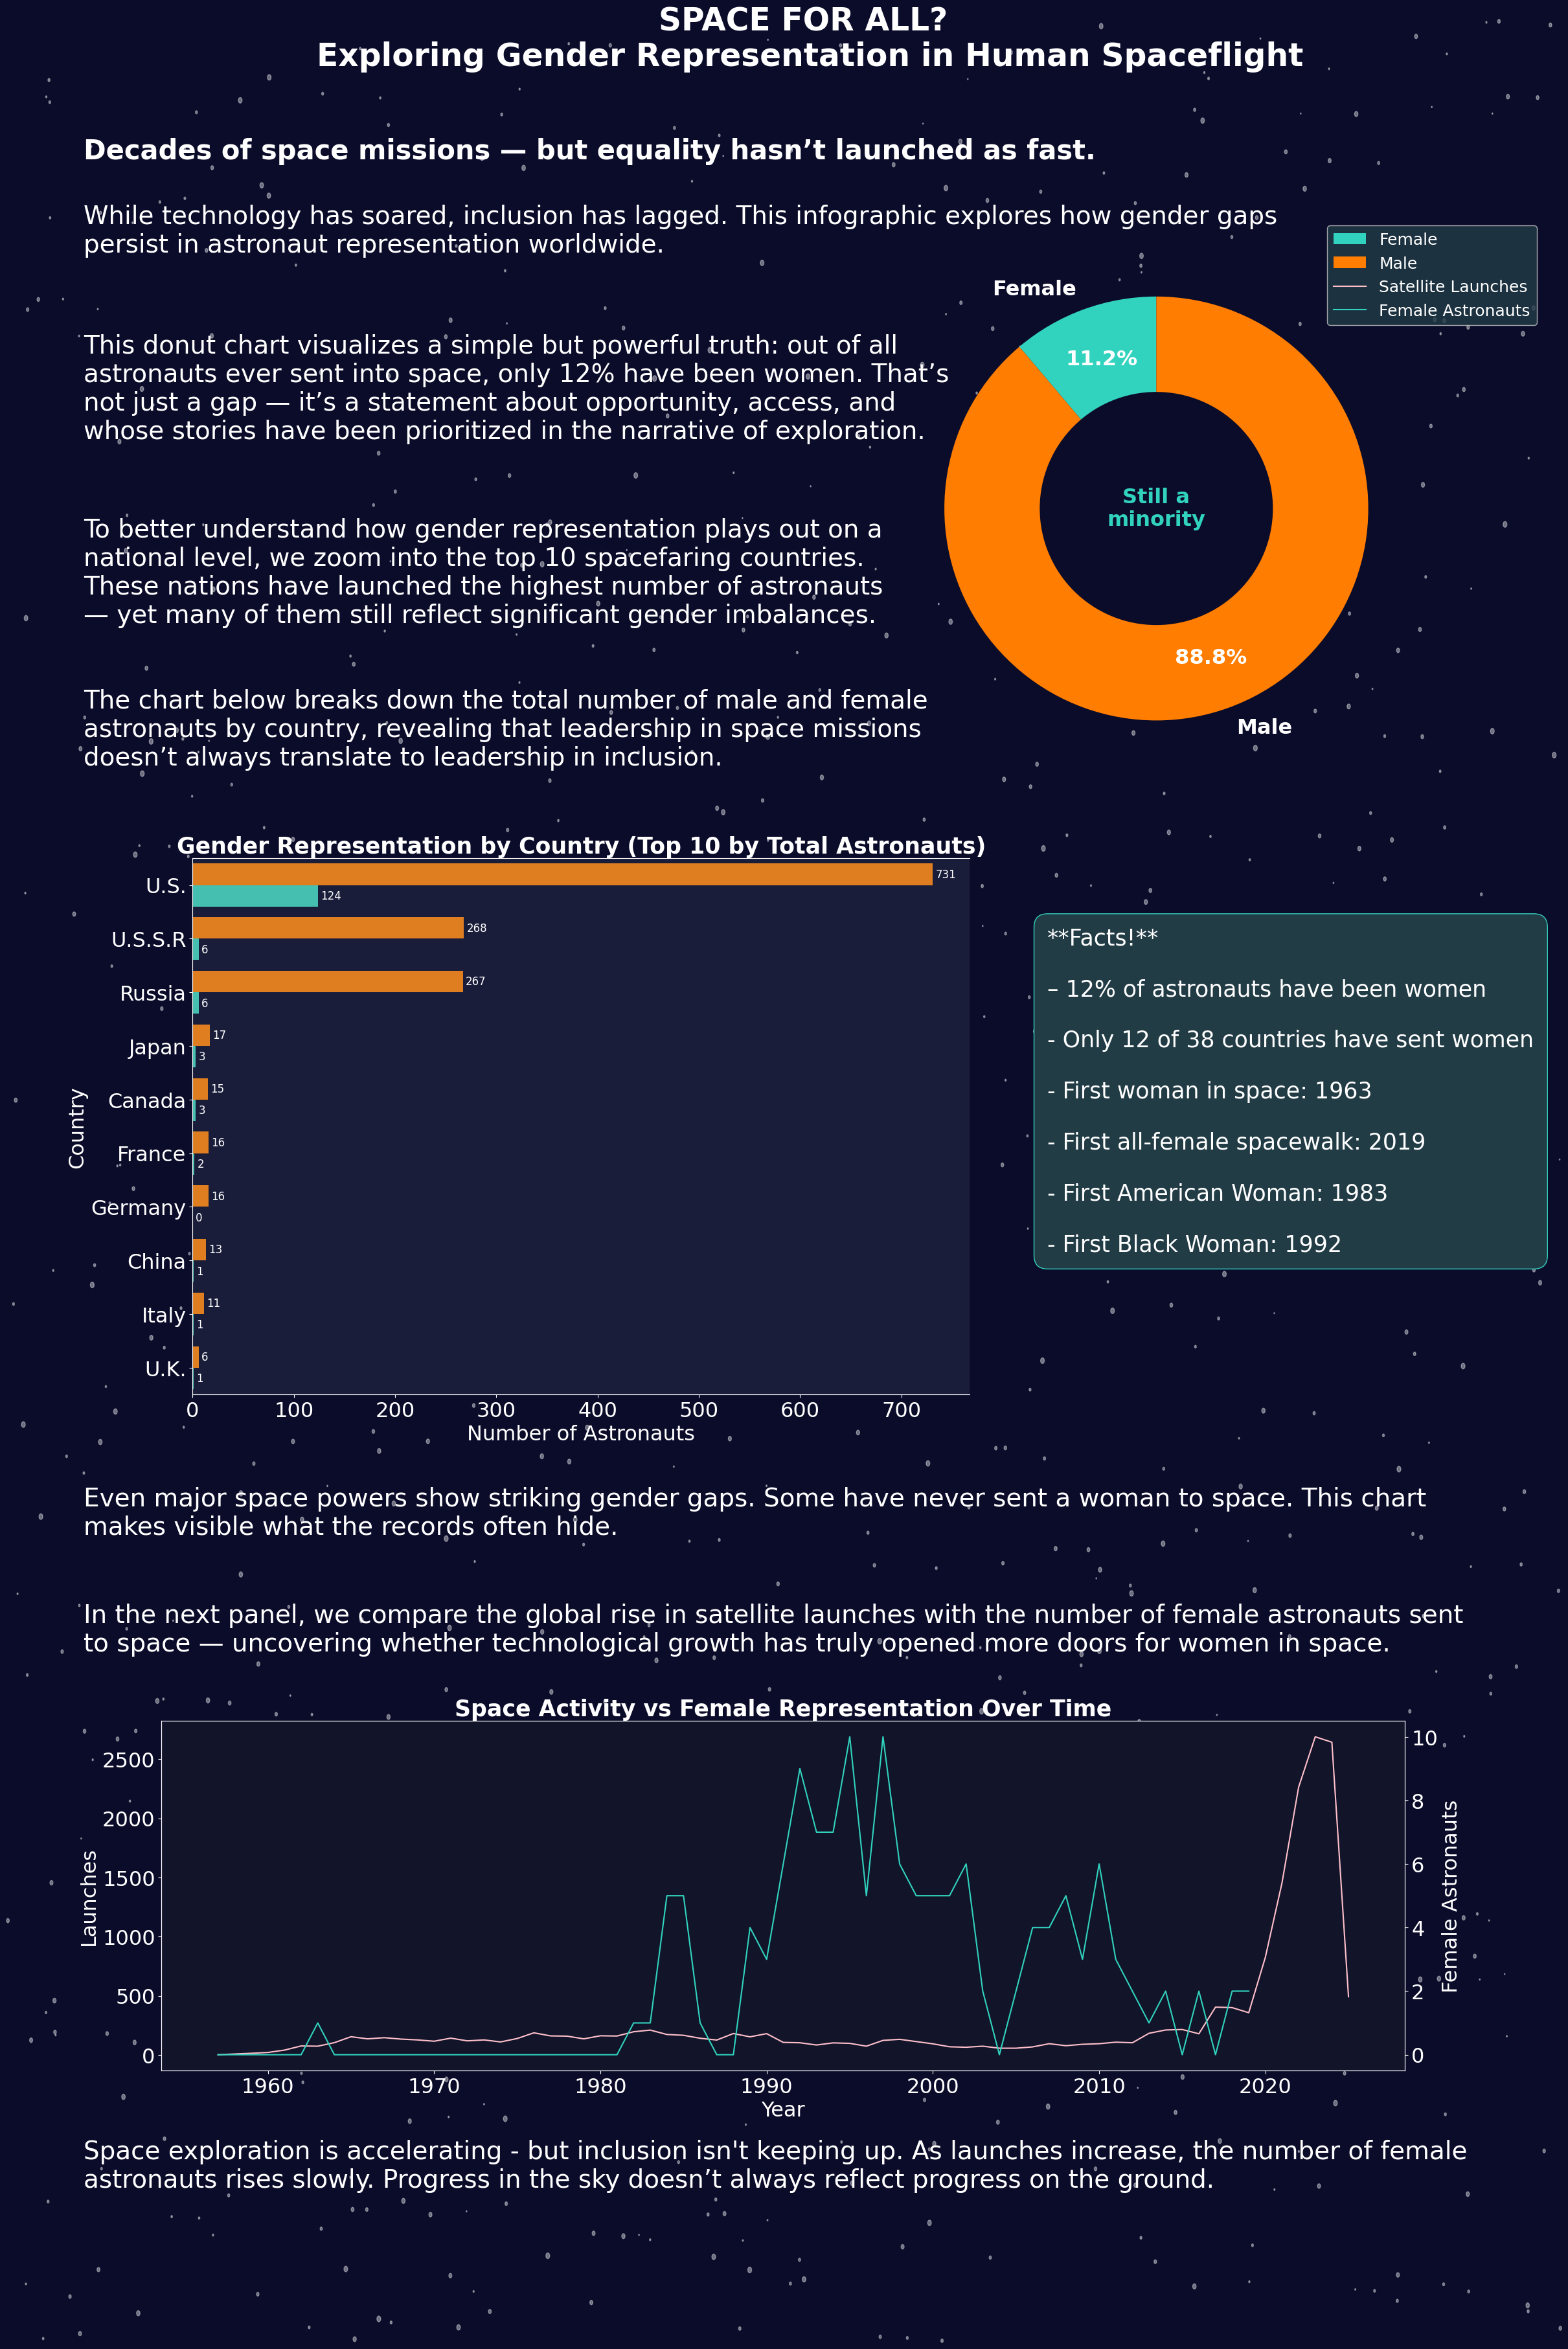

In [7]:
# Plot 1
gender_total = astr_data['Profile.Gender'].value_counts()
sizes = [gender_total.get('female', 0), gender_total.get('male', 0)]
labels = ['Female', 'Male']
colors = ['#31D3BE', '#FF7D00']


# Plot 2
df = astr_data[astr_data['Profile.Gender'].isin(['male', 'female'])]
df['Profile_Nationality_Split'] = df['Profile.Nationality'].str.split('/')
df = df.explode('Profile_Nationality_Split')
df['Profile.Nationality'] = df['Profile_Nationality_Split'].str.strip()
df = df.drop(columns='Profile_Nationality_Split')
gender_counts = df.groupby(['Profile.Nationality', 'Profile.Gender']).size().unstack(fill_value=0)
gender_counts['Total'] = gender_counts.sum(axis=1)
gender_counts['% Female'] = (gender_counts['female'] / gender_counts['Total']) * 100
top_countries = gender_counts.sort_values('Total', ascending=False).head(10)

# Filter top 10 countries by total astronaut count
top_gender = gender_counts.sort_values('Total', ascending=False).head(10)

gender_melted = top_gender[['male', 'female']].reset_index().melt(id_vars='Profile.Nationality', 
                                                                  value_vars=['male', 'female'], 
                                                                  var_name='Gender', 
                                                                  value_name='Count')
# Plot 3
astr_data['Mission.Year'] = pd.to_numeric(astr_data['Mission.Year'], errors='coerce')
astr_data_clean = astr_data.dropna(subset=['Mission.Year'])

launches_per_year = data_filtered.groupby('Year').size()
female_astronauts = astr_data_clean[astr_data_clean['Profile.Gender'] == 'female'].groupby('Mission.Year').size()

launches_per_year.index = launches_per_year.index.astype(int)
female_astronauts.index = female_astronauts.index.astype(int)

combined = pd.DataFrame({
    'Launches': launches_per_year,
    'Female Astronauts': female_astronauts
}).fillna(0).sort_index()

# Creating the poster
fig = plt.figure(figsize=(24, 36), dpi=100)
fig.set_facecolor('#0B0C2A')

# Adding Star field in the background
num_stars = 800
star_x = np.random.rand(num_stars)
star_y = np.random.rand(num_stars)
star_sizes = np.random.uniform(1, 5, num_stars)

for x, y, s in zip(star_x, star_y, star_sizes):
    star = Circle((x, y), radius=s/4000, transform=fig.transFigure,
                  color='white', alpha=0.4, zorder=0)
    fig.patches.append(star)

plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'axes.titlecolor': 'white',
    'xtick.labelsize': 23,
    'ytick.labelsize': 23,
})

# Plot 1: 
ax1 = fig.add_axes([0.54, 0.69, 0.40, 0.20])

# Donut chart
wedges, texts, autotexts = ax1.pie(
    sizes, labels=labels, colors=colors, startangle=90,
    autopct='%1.1f%%', pctdistance=0.75, textprops={'color': 'white', 'fontsize': 23,'weight':'bold'}
)

# Draw donut
centre_circle = plt.Circle((0, 0), 0.55, fc='#0B0C2A')  
ax1.add_artist(centre_circle)
ax1.text(0, 0, "Still a\nminority", ha='center', va='center', fontsize=23, color='#31D3BE', weight='bold')
ax1.axis('equal')


# Plot 2
ax2 = fig.add_axes([0.12, 0.41, 0.5, 0.23])  
sns.barplot(data=gender_melted, x='Count', y='Profile.Nationality', hue='Gender', palette={'male': '#FF7D00', 'female': '#31D3BE'})

# Labels and titles
plt.xlabel('Number of Astronauts',fontsize=23)
plt.ylabel('Country',fontsize=23)
plt.title('Gender Representation by Country (Top 10 by Total Astronauts)', fontsize=25, weight='bold')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

ax2.legend_.remove()
ax2.spines['right'].set_visible(False)

# Plot 3
ax3 = fig.add_axes([0.1, 0.12, 0.8, 0.15])  
ax3.plot(combined.index, combined['Launches'], color='pink', label='Satellite Launches')
ax4 = ax3.twinx()
last_female_year = female_astronauts.index.max()
combined = combined[combined.index <= last_female_year]
ax4.plot(combined.index, combined['Female Astronauts'], color='#31D3BE', label='Female Astronauts')
ax3.set_ylabel('Launches', fontsize=23)
ax4.set_ylabel('Female Astronauts', fontsize=23)
ax3.set_title("Space Activity vs Female Representation Over Time", fontsize=25, weight='bold')
ax3.set_xlabel('Year',fontsize=23)

# Setting axes facecolor and zorder
ax1.set_facecolor("#1A1D3A")
ax2.set_facecolor("#1A1D3A")
ax3.set_facecolor("#12152A")
ax1.set_zorder(2)
ax2.set_zorder(2)
ax3.set_zorder(2)
ax4.set_zorder(2)

# Get handles from ax1)
handles1, labels1 = ax1.get_legend_handles_labels()

# Get handles from ax3 and ax4
handles2, labels2 = ax3.get_legend_handles_labels()
handles3, labels3 = ax4.get_legend_handles_labels()

all_handles = handles1 + handles2 + handles3
all_labels = labels1 + labels2 + labels3

fig.legend(
    handles=all_handles,
    labels=all_labels,
    loc='center right',
    bbox_to_anchor=(0.99, 0.89), 
    frameon=True,
    facecolor='#223C46',
    fontsize=18
)

# Text
fig.text(0.42, 0.995, 'SPACE FOR ALL?',weight='bold', fontsize=35)

fig.text(0.20,0.98,'Exploring Gender Representation in Human Spaceflight', fontsize=35, weight='bold')

fig.text(0.05, 0.94,'Decades of space missions — but equality hasn’t launched as fast.',weight='bold',fontsize=30)

fig.text(0.05,0.90,'While technology has soared, inclusion has lagged. This infographic explores how gender gaps\npersist in astronaut representation worldwide.',fontsize=28)

fig.text(0.05,0.82,'This donut chart visualizes a simple but powerful truth: out of all\nastronauts ever sent into space, only 12% have been women. That’s\nnot just a gap — it’s a statement about opportunity, access, and\nwhose stories have been prioritized in the narrative of exploration.',fontsize=28)

fig.text(0.05,0.68, "To better understand how gender representation plays out on a\nnational level, we zoom into the top 10 spacefaring countries.\nThese nations have launched the highest number of astronauts\n— yet many of them still reflect significant gender imbalances.\n\n\nThe chart below breaks down the total number of male and female\nastronauts by country, revealing that leadership in space missions\ndoesn’t always translate to leadership in inclusion.", fontsize=28)

fig.text(0.67, 0.54, '**Facts!**\n\n– 12% of astronauts have been women\n\n- Only 12 of 38 countries have sent women\n\n- First woman in space: 1963\n\n- First all-female spacewalk: 2019\n\n- First American Woman: 1983\n\n- First Black Woman: 1992', 
         fontsize=25, color='white', weight='normal', ha='left', va='center',
         bbox=dict(boxstyle='round,pad=0.6', facecolor='#223C46', edgecolor='#31D3BE', linewidth=1))

fig.text(0.05, 0.35,'Even major space powers show striking gender gaps. Some have never sent a woman to space. This chart\nmakes visible what the records often hide.', fontsize=28)

fig.text(0.05,0.30, 'In the next panel, we compare the global rise in satellite launches with the number of female astronauts sent\nto space — uncovering whether technological growth has truly opened more doors for women in space.', fontsize=28)

fig.text(0.05, 0.07, "Space exploration is accelerating - but inclusion isn't keeping up. As launches increase, the number of female\nastronauts rises slowly. Progress in the sky doesn’t always reflect progress on the ground.",fontsize=28)

plt.savefig("Gender_Diversity_Space_Poster.png", dpi=600, bbox_inches='tight')

plt.show()